In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rsbeams.rsstats import sample

# Example 1 - illustrates sampling methods
Sampling from a gaussian function

In [2]:
a_gauss, b_gauss = -5., 5.  # Range to sample on
sigma = 1.42
N = 50000  # Number of points to sample

In [3]:
def gaussian(x):
    return 1. * np.exp(-x**2 / sigma**2)
x_gauss = np.linspace(a_gauss, b_gauss, 100)

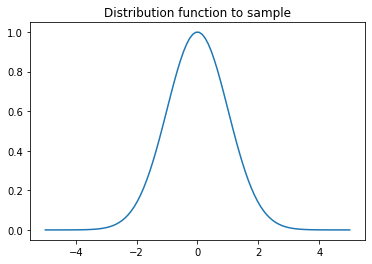

In [4]:
plt.figure()
plt.title('Distribution function to sample')
plt.plot(x_gauss, gaussian(x_gauss))
plt.show()

## Method: `random`
`Method` dictates how samples will be drawn the options are: `random` and `halton`.
The `random` method is the default and draws from a uniform distribution. The `halton` method uses Halton sequences to perform non-random sampling. 

In [5]:
n_random = sample.sample(N, gaussian, a_gauss, b_gauss)

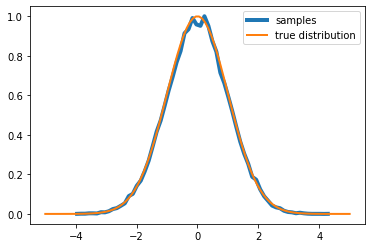

In [6]:
plt.figure()
counts, edges = np.histogram(n_random, bins=64)
centers = [(edges[i+1] + edges[i]) / 2. for i in range(edges.size - 1)]
plt.plot(centers, counts / np.max(counts), label='samples', linewidth=4)
plt.plot(x_gauss, gaussian(x_gauss), label='true distribution', linewidth=2)
plt.legend()
plt.show()

## Method: `halton`

In [7]:
n_halton = sample.sample(N, gaussian, a_gauss, b_gauss, method='halton')

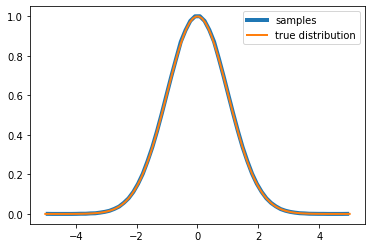

In [8]:
plt.figure()
counts, edges = np.histogram(n_halton, bins=64)
centers = [(edges[i+1] + edges[i]) / 2. for i in range(edges.size - 1)]
plt.plot(centers, counts / np.max(counts), label='samples', linewidth=4)
plt.plot(x_gauss, gaussian(x_gauss), label='true distribution', linewidth=2)
plt.legend()
plt.show()

# Example 2 - illustrates inversion methods
Sampling from a sine function

In [9]:
a_sine, b_sine = 0., 25.  # Range to sample on
N = 50000  # Number of points to sample

In [10]:
def sinusoid(x):
    return 0.25 * np.sin(2*np.pi*x / 5) + 1.
x_sine = np.linspace(0, 25, 100)

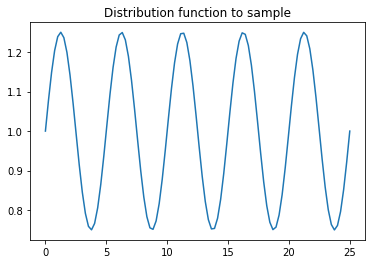

In [11]:
plt.figure()
plt.title('Distribution function to sample')
plt.plot(x_sine, sinusoid(x_sine))
plt.show()

## Inverision Method: `numeric`
Will be sensitive to setting of `wn`, the number of points on the weight/sampling grid.

In [12]:
n_numeric_low = sample.sample(N, sinusoid, a_sine, b_sine, wn=1000, invert='numeric')
n_numeric_high = sample.sample(N, sinusoid, a_sine, b_sine, wn=100000, invert='numeric')

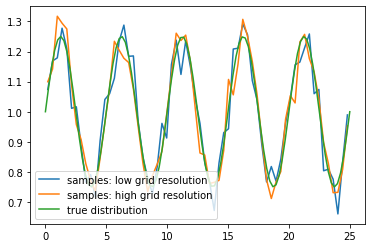

In [13]:
plt.figure()

counts, edges = np.histogram(n_numeric_low, bins=64)
centers = [(edges[i+1] + edges[i]) / 2. for i in range(edges.size - 1)]
plt.plot(centers, counts / np.average(counts), label='samples: low grid resolution')

counts, edges = np.histogram(n_numeric_high, bins=64)
centers = [(edges[i+1] + edges[i]) / 2. for i in range(edges.size - 1)]
plt.plot(centers, counts / np.average(counts), label='samples: high grid resolution')

plt.plot(x_sine, sinusoid(x_sine), label='true distribution')
plt.legend()
plt.show()

## Method: `interpolate`
Will tend to better resolve fine features of the distribution and allows for true Halton sequence sampling.

In [14]:
n_interpoalte = sample.sample(N, sinusoid, a_sine, b_sine, method='halton', invert='numeric')

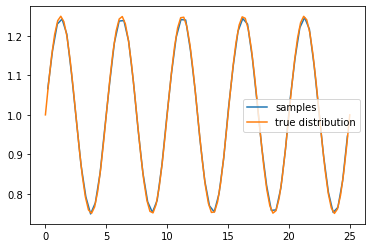

In [15]:
plt.figure()
counts, edges = np.histogram(n_interpoalte, bins=64)
centers = [(edges[i+1] + edges[i]) / 2. for i in range(edges.size - 1)]
plt.plot(centers, counts / np.average(counts), label='samples')
plt.plot(x_sine, sinusoid(x_sine), label='true distribution')
plt.legend()
plt.show()

In [82]:
def cdf_on_grid(distribution, a, b, wn, args=None):
    x = np.linspace(a, b, wn)

    if args:
        try:
            args[0]
        except TypeError:
            args = (args,)
        weights = distribution(x, *args)
    else:
        weights = distribution(x)

    cdf_vals = _calculate_cdf(weights)
    return cdf_vals

In [83]:
wn = 100000

In [84]:
sinusoid_cdf = cdf_on_grid(sinusoid, 0, 25, wn=wn)

In [85]:
gaussian_cdf = cdf_on_grid(gaussian, -5, 5, wn=wn)

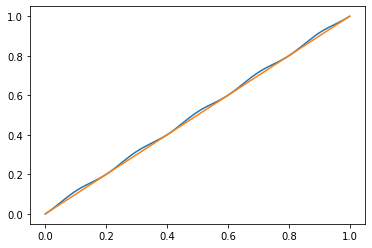

In [86]:
plt.figure()
plt.plot(np.linspace(0, 1, wn), sinusoid_cdf)
plt.plot([0, 1], [0, 1])
plt.show()

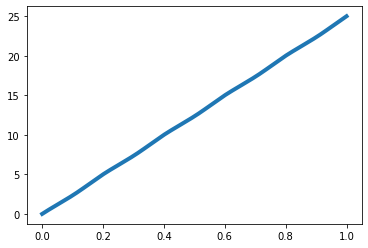

In [65]:
plt.figure()
icdf = interpolate.interp1d(sinusoid_cdf, np.linspace(0, 25, wn), kind='cubic', fill_value='extrapolate')
plt.plot(np.linspace(0, 1, wn), icdf(np.linspace(0, 1, wn)), linewidth=4)
plt.show()

In [44]:
from scipy import special

In [ ]:
special.erfinv

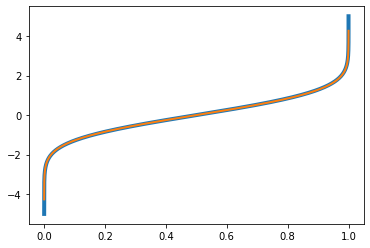

In [62]:
plt.figure()
icdf = interpolate.interp1d(gaussian_cdf, np.linspace(-5, 5, wn), kind='cubic', fill_value='extrapolate')
plt.plot(np.linspace(0, 1, wn), icdf(np.linspace(0, 1, wn)), linewidth=4)
plt.plot(np.linspace(0, 1, wn), np.sqrt(2)*special.erfinv(2*np.linspace(0, 1, wn) - 1), linewidth=2)
plt.show()

In [73]:
icdf = interpolate.interp1d(sinusoid_cdf, np.linspace(0, 25, 100000), kind='cubic', fill_value='extrapolate')

In [74]:
y = np.random.uniform(0, 1, 50000)

In [75]:
icdf(y)

array([2.28733089e+01, 2.11190769e+01, 7.75779742e+00, ...,
       6.32960363e+00, 2.21094602e+01, 5.10629513e-03])

In [88]:
interpolate.interp1d(sinusoid_cdf, np.linspace(0, 25, 100000), kind='as')

NotImplementedError: as is unsupported: Use fitpack routines for other types.

In [89]:
interpolate.interp1d?

Init signature:
interpolate.interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
    zer